# Exercise 1: Apache Spark Basics

In [2]:
import pyspark
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext

### 1.Perform rightOuterJoin and fullOuterJoin operations between a and b. Briefly explain your solution.
1. used parallelize of feed the data as rdd in spark system 

In [3]:
rdd_a = sc.parallelize(["spark", "rdd", "python", "context", "create", "class"])

In [4]:
rdd_b = sc.parallelize(["operation", "apache", "scala", "lambda","parallel","partition"])

 2. mapping the data list in order to reduce later based on the keys 

In [5]:
a = rdd_a.map(lambda x: (x,1))
for element in a.collect():
    print(element)

('spark', 1)
('rdd', 1)
('python', 1)
('context', 1)
('create', 1)
('class', 1)


In [6]:
b = rdd_b.map(lambda x: (x,1))
for element in b.collect():
    print(element)

('operation', 1)
('apache', 1)
('scala', 1)
('lambda', 1)
('parallel', 1)
('partition', 1)



2. applied Right outer join on the two datasets by using rightOuterJoin

In [7]:
right_outer_join = a.rightOuterJoin(b)
right_outer_join = right_outer_join.map(lambda x : x[0])
for element in right_outer_join.collect():
    print(element)

scala
operation
apache
parallel
partition
lambda


3. applied Full outer join on the two datasets by using rightOuterJoin

In [8]:
full_outer_join = a.fullOuterJoin(b)
full_outer_join = full_outer_join.map(lambda x : x[0])
for element in full_outer_join.collect():
    print(element)

python
context
scala
rdd
operation
apache
spark
create
parallel
partition
lambda
class


### Using map and reduce functions to count how many times the character "s" appears in all a and b.
4. Applying keys to the full outer join output to get the s count from the words in this variable

In [9]:
a_with_s = full_outer_join.map(lambda x: (x,1))
a_with_s.collect()


[('python', 1),
 ('context', 1),
 ('scala', 1),
 ('rdd', 1),
 ('operation', 1),
 ('apache', 1),
 ('spark', 1),
 ('create', 1),
 ('parallel', 1),
 ('partition', 1),
 ('lambda', 1),
 ('class', 1)]

5. definition intialization for checking the s word. It checks the word at every character ans if the word has a s in it the count variable will be added with 1 each time 

In [10]:
def check_for_s(word):
    count = 0
    for idx in word:
        if idx == 's':
                count += 1
    return count

6. Using map with the above definition to assign the number of s in a word as the key to every word in the full outer join output
7. The newly mapped keys with the number of s as keys are reduced to get the total number of s in all the words by using spark hadoop map reduce methods

In [11]:
count_s_words = a_with_s.map(lambda x:(x[0], check_for_s(x[0])))
count_from_reduce = count_s_words.map(lambda a:a[1]).reduce(lambda a,b:a+b)

In [12]:
count_from_reduce

4

### Using aggregate function to count how many times the character "s" appears in all a and b.
8. now using the aggreagte method of spark we have first done the similar thing as we are first assigning the nuber of s charscters in each word by using the above method and than adding all the counts to the the total number

In [13]:
count_from_aggregate = a_with_s.aggregate(0,lambda a,x: a + check_for_s(x[0]), lambda a,b: a+b)

In [14]:
count_from_aggregate

4

# Part b) Basic Operations on DataFrames
### 1. Replace the null value(s) in column points by the mean of all points.

In [15]:
from pyspark import SparkFiles
df = sqlContext.read.json("students.json")

In [16]:
df.show()

+------------------+------------------+----------+---------+------+----+
|            course|               dob|first_name|last_name|points|s_id|
+------------------+------------------+----------+---------+------+----+
|Humanities and Art|  October 14, 1983|      Alan|      Joe|    10|   1|
|  Computer Science|September 26, 1980|    Martin|  Genberg|    17|   2|
|    Graphic Design|     June 12, 1982|     Athur|   Watson|    16|   3|
|    Graphic Design|     April 5, 1987|  Anabelle|  Sanberg|    12|   4|
|        Psychology|  November 1, 1978|      Kira| Schommer|    11|   5|
|          Business|  17 February 1981| Christian|   Kiriam|    10|   6|
|  Machine Learning|    1 January 1984|   Barbara|  Ballard|    14|   7|
|     Deep Learning|  January 13, 1978|      John|     null|    10|   8|
|  Machine Learning|  26 December 1989|    Marcus|   Carson|    15|   9|
|           Physics|  30 December 1987|     Marta|   Brooks|    11|  10|
|    Data Analytics|     June 12, 1975|     Holly| 

9. After loading the dataset into sparks dataframe, I have converted the points column into numpy array to calculate mean of all points by looping through the data in array.
10. after calculating mean I have replaced the null value in the dataset in points column by using dataframe null fill methods.
### Replace the null value(s) in column dob and column last name by "unknown" and "--" respectively.
11. Similarly, filled the null values in the dob and lastname columns with 'unknown' and '--' respectivelty.

In [17]:
#Replace the null value(s) in column points by the mean of all points.
import numpy as np
import math
sum = 0
x = np.array(df.select("points").collect()) 
for i, data in enumerate(x):
    if data == None:
        print(f'On {i} row is a {data}')
    else:
        sum = sum + data

mean_points = sum/len(x)
mean_points[0]
df_point = df.na.fill(value=mean_points[0],subset=["points"])
df_dob = df_point.na.fill(value='unknown', subset=["dob"])
df = df_dob.na.fill(value='--', subset=["last_name"])
df.show()
#df.na.fill(value='NO VALUE',subset=["dob", "first_name", "last_name"]).show()

On 11 row is a [None]
+------------------+------------------+----------+---------+------+----+
|            course|               dob|first_name|last_name|points|s_id|
+------------------+------------------+----------+---------+------+----+
|Humanities and Art|  October 14, 1983|      Alan|      Joe|    10|   1|
|  Computer Science|September 26, 1980|    Martin|  Genberg|    17|   2|
|    Graphic Design|     June 12, 1982|     Athur|   Watson|    16|   3|
|    Graphic Design|     April 5, 1987|  Anabelle|  Sanberg|    12|   4|
|        Psychology|  November 1, 1978|      Kira| Schommer|    11|   5|
|          Business|  17 February 1981| Christian|   Kiriam|    10|   6|
|  Machine Learning|    1 January 1984|   Barbara|  Ballard|    14|   7|
|     Deep Learning|  January 13, 1978|      John|       --|    10|   8|
|  Machine Learning|  26 December 1989|    Marcus|   Carson|    15|   9|
|           Physics|  30 December 1987|     Marta|   Brooks|    11|  10|
|    Data Analytics|     June

### In the dob column, there exist several formats of dates, e.g. October 14, 1983 and 26 December 1989. Let's convert all the dates into DD-MM-YYYY format where DD, MM and YYYY are two digits for day, two digits for months and four digits for year respectively.

1. I wrote a method to assign the month number to the month word

In [18]:
def month_string_to_number(string):
    m = {
        'jan': '01',
        'feb': '02',
        'mar': '03',
        'apr': '04',
         'may':'05',
         'jun':'06',
         'jul':'07',
         'aug':'08',
         'sep':'09',
         'oct':'10',
         'nov':'11',
         'dec':'12'
        }
    s = string.strip()[:3].lower()
    try:
        out = m[s]
        return out
    except:
        raise ValueError('Not a month')


#### 2. made another method to convert the date into the format given as DD-MM-YYYY.
  ##### a. Firstly, I have intialized the month, date and year variable to split the values from each string and store the       converted parts in these variables
  ##### b. Then I have removed commas in the string 
  ##### c. then I have split the transformed string by space in the string to seperte the words
  ##### d. Then the following for loop iterates through the split list of month, date and year.
  ##### c. It then checks id the coming string has alphabets which means its going to be the month so it assigns the month its respective month value
  ##### d. if the string is not alpha then then it checks the length of the string, if it is four that means year and less than that is month and I then transform the date with a padded 0 if the length is 1 
  ##### e. then I am concatinating the transformed strings into the required format

In [22]:
from pyspark.sql.functions import lit
from pyspark.sql import functions as F 

def convert_date(dob):
    print(dob)
    Month = ""
    Date = ""
    Year = ""
    Date_concat = None
    date_string = str(dob)
    date_list = []
    transformed_string=date_string.replace(",","")
    print(transformed_string)
    list_dm = transformed_string.split(' ')
    print(list_dm)
    #print(list_dm)
    for i , values in enumerate(list_dm):
        if values.isalpha():
            if values == 'unknown':
                Date_concat = 'unknown'
                continue
            else:
                Month = month_string_to_number(values)
        else:
            if len(values) == 4:
                Year = values
            else:
                Date = values
                if len(Date) > 1:
                    Date = values
                else:
                    Date = "0"+ Date

        Date_concat = Date + "-" + Month + "-" + Year
    return Date_concat
    

#     df2 = df.withColumn("date", lit(str(lit_lst)))
#     print(date_list)


In [23]:
# Insert a new column age and calculate the current age of all students.
#df['new_dob'] = np.array(date_list)
value = convert_date('October 14, 1983')
value
#df2 = df.withColumn("date", lit(str(date_list)))
# df2.show()

October 14, 1983
October 14 1983
['October', '14', '1983']


'14-10-1983'

Adding a new column to the dataframe with the transformed dates by using pyspark sql functions which takes user defined functions to add values by iterating through the dataframe itself

In [25]:
from pyspark.sql.types import StructType

from pyspark.sql.types import *
df = df.withColumn("new_date",  F.udf(convert_date, StringType())(F.col("dob")))

In [26]:
df.show()

+------------------+------------------+----------+---------+------+----+----------+
|            course|               dob|first_name|last_name|points|s_id|  new_date|
+------------------+------------------+----------+---------+------+----+----------+
|Humanities and Art|  October 14, 1983|      Alan|      Joe|    10|   1|14-10-1983|
|  Computer Science|September 26, 1980|    Martin|  Genberg|    17|   2|26-09-1980|
|    Graphic Design|     June 12, 1982|     Athur|   Watson|    16|   3|12-06-1982|
|    Graphic Design|     April 5, 1987|  Anabelle|  Sanberg|    12|   4|05-04-1987|
|        Psychology|  November 1, 1978|      Kira| Schommer|    11|   5|01-11-1978|
|          Business|  17 February 1981| Christian|   Kiriam|    10|   6|17-02-1981|
|  Machine Learning|    1 January 1984|   Barbara|  Ballard|    14|   7|01-01-1984|
|     Deep Learning|  January 13, 1978|      John|       --|    10|   8|13-01-1978|
|  Machine Learning|  26 December 1989|    Marcus|   Carson|    15|   9|26-1

### Insert a new column age and calculate the current age of all students.

1. for this task, I have made another methed for calulating age of all the students.
2. I am using dateutil library to parse the string to datetime formate to calculate the current age of all students
3. using datetime to get the current date, which is then subtracted from the date of birth to get teh age

In [27]:
from datetime import date
from dateutil import parser
 
def age(birthdate):
    age = 0
    if birthdate == 'unknown':
        age = 'unknown'
    else:
        #date_time_obj = datetime.strptime(birthdate,'%d-%m-%y')
        dt_obj = parser.parse(birthdate)
        print(dt_obj)
        today = date.today()
        age = today.year - dt_obj.year - ((today.month, today.day) < (dt_obj.month, dt_obj.day))
    return age

In [28]:
df = df.withColumn("age",  F.udf(age, StringType())(F.col("new_date")))
df.show()

+------------------+------------------+----------+---------+------+----+----------+-------+
|            course|               dob|first_name|last_name|points|s_id|  new_date|    age|
+------------------+------------------+----------+---------+------+----+----------+-------+
|Humanities and Art|  October 14, 1983|      Alan|      Joe|    10|   1|14-10-1983|     38|
|  Computer Science|September 26, 1980|    Martin|  Genberg|    17|   2|26-09-1980|     41|
|    Graphic Design|     June 12, 1982|     Athur|   Watson|    16|   3|12-06-1982|     39|
|    Graphic Design|     April 5, 1987|  Anabelle|  Sanberg|    12|   4|05-04-1987|     35|
|        Psychology|  November 1, 1978|      Kira| Schommer|    11|   5|01-11-1978|     44|
|          Business|  17 February 1981| Christian|   Kiriam|    10|   6|17-02-1981|     41|
|  Machine Learning|    1 January 1984|   Barbara|  Ballard|    14|   7|01-01-1984|     38|
|     Deep Learning|  January 13, 1978|      John|       --|    10|   8|13-01-19

### Let's consider granting some points for good performed students in the class. For each student, if his point is larger than 1 standard deviation of all points, then we update his current point to 20, which is the maximum.
1. Calulating the global standard deviation and mean usind pyspark sql command

In [29]:
from pyspark.sql.functions import *
df.createOrReplaceTempView("students")
spark.sql("select STDDEV(points), mean(points) from students").show()

+-----------------+------------+
|   stddev(points)|mean(points)|
+-----------------+------------+
|3.246050231475656|        11.7|
+-----------------+------------+



To caluate the new points, on 1 std formula, I have created the function which calculates the mean and standard deviation plus and minus to get the range.
if point is greater than the highest range point than it will be changed to 20 otherwise it remains same 

In [30]:
def assign_new_score(point):
    std = 3.24605
    points = 0
    mean = 11.7
    std_mean_plus = mean+std
    std_mean_minus = mean-std
    if point > std_mean_plus:
        points = 20
    else:
        points = point
    return points

In [31]:
df = df.withColumn("new_points",  F.udf(assign_new_score, StringType())(F.col("points")))

In [32]:
df.show()

+------------------+------------------+----------+---------+------+----+----------+-------+----------+
|            course|               dob|first_name|last_name|points|s_id|  new_date|    age|new_points|
+------------------+------------------+----------+---------+------+----+----------+-------+----------+
|Humanities and Art|  October 14, 1983|      Alan|      Joe|    10|   1|14-10-1983|     38|        10|
|  Computer Science|September 26, 1980|    Martin|  Genberg|    17|   2|26-09-1980|     41|        20|
|    Graphic Design|     June 12, 1982|     Athur|   Watson|    16|   3|12-06-1982|     39|        20|
|    Graphic Design|     April 5, 1987|  Anabelle|  Sanberg|    12|   4|05-04-1987|     35|        12|
|        Psychology|  November 1, 1978|      Kira| Schommer|    11|   5|01-11-1978|     44|        11|
|          Business|  17 February 1981| Christian|   Kiriam|    10|   6|17-02-1981|     41|        10|
|  Machine Learning|    1 January 1984|   Barbara|  Ballard|    14|   7|0

### Create a histogram on the new points created in the task 5.

Text(0, 0.5, 'New Points')

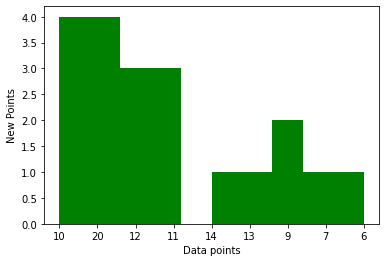

In [33]:
import matplotlib.pyplot as plt
x = np.array(df.select("new_points").collect()) 
plt.hist(x , color = 'green')
plt.xlabel('Data points')
plt.ylabel('New Points')

# Exercise 2: Manipulating Recommender Dataset with Apache Spark

### A tagging session for a user can be defned as the duration in which he/she generated tagging activities. Typically, an inactive duration of 30 mins is considered as a termination of the tagging session. Your task is to separate out tagging sessions for each user.

In [34]:
from pyspark import SparkFiles
df_tags = sqlContext.read.csv(SparkFiles.get("C:/Users/HP/tags.csv"), header=True, inferSchema= True)

In [35]:
df_tags.show()

+------+-------+--------------------+----------+
|UserID|MovieID|                 Tag| Timestamp|
+------+-------+--------------------+----------+
|    15|   4973|          excellent!|1215184630|
|    20|   1747|            politics|1188263867|
|    20|   1747|              satire|1188263867|
|    20|   2424|     chick flick 212|1188263835|
|    20|   2424|               hanks|1188263835|
|    20|   2424|                ryan|1188263835|
|    20|   2947|              action|1188263755|
|    20|   2947|                bond|1188263756|
|    20|   3033|               spoof|1188263880|
|    20|   3033|           star wars|1188263880|
|    20|   7438|              bloody|1188263801|
|    20|   7438|             kung fu|1188263801|
|    20|   7438|           Tarantino|1188263801|
|    21|  55247|                   R|1205081506|
|    21|  55253|               NC-17|1205081488|
|    25|     50|        Kevin Spacey|1166101426|
|    25|   6709|         Johnny Depp|1162147221|
|    31|     65|    

In [36]:
df_tags.orderBy(col("Timestamp").desc())
df_tags.show()

+------+-------+--------------------+----------+
|UserID|MovieID|                 Tag| Timestamp|
+------+-------+--------------------+----------+
|    15|   4973|          excellent!|1215184630|
|    20|   1747|            politics|1188263867|
|    20|   1747|              satire|1188263867|
|    20|   2424|     chick flick 212|1188263835|
|    20|   2424|               hanks|1188263835|
|    20|   2424|                ryan|1188263835|
|    20|   2947|              action|1188263755|
|    20|   2947|                bond|1188263756|
|    20|   3033|               spoof|1188263880|
|    20|   3033|           star wars|1188263880|
|    20|   7438|              bloody|1188263801|
|    20|   7438|             kung fu|1188263801|
|    20|   7438|           Tarantino|1188263801|
|    21|  55247|                   R|1205081506|
|    21|  55253|               NC-17|1205081488|
|    25|     50|        Kevin Spacey|1166101426|
|    25|   6709|         Johnny Depp|1162147221|
|    31|     65|    

In [37]:
from pyspark.sql.window import Window
from pyspark.sql.functions import row_number

### First Step
1. getting the previous timestamp for each UserID so that it can be used for calculating the differnce in the next step

In [38]:
df_tags = df_tags.withColumn(
    "session_id",
    F.lag("Timestamp").over(Window.partitionBy("UserID").orderBy("Timestamp")),
)

In [39]:
df_tags.show()

+------+-------+--------------------+----------+----------+
|UserID|MovieID|                 Tag| Timestamp|session_id|
+------+-------+--------------------+----------+----------+
|    15|   4973|          excellent!|1215184630|      null|
|    20|   2947|              action|1188263755|      null|
|    20|   2947|                bond|1188263756|1188263755|
|    20|   7438|              bloody|1188263801|1188263756|
|    20|   7438|             kung fu|1188263801|1188263801|
|    20|   7438|           Tarantino|1188263801|1188263801|
|    20|   2424|     chick flick 212|1188263835|1188263801|
|    20|   2424|               hanks|1188263835|1188263835|
|    20|   2424|                ryan|1188263835|1188263835|
|    20|   1747|            politics|1188263867|1188263835|
|    20|   1747|              satire|1188263867|1188263867|
|    20|   3033|               spoof|1188263880|1188263867|
|    20|   3033|           star wars|1188263880|1188263880|
|    31|   6373|   comedy of manners|118

### Second Step
Assigning 1 to sessions where the differnce of timestamp and previous timestamp is greater than 1800 which is 30 mins otherwise its 0

In [40]:
df_tags = df_tags.withColumn(
    "session_id",
    F.when(F.col("timestamp") - F.col("session_id") <= 1800, 0).otherwise(1),
)
df_tags.show()

+------+-------+--------------------+----------+----------+
|UserID|MovieID|                 Tag| Timestamp|session_id|
+------+-------+--------------------+----------+----------+
|    15|   4973|          excellent!|1215184630|         1|
|    20|   2947|              action|1188263755|         1|
|    20|   2947|                bond|1188263756|         0|
|    20|   7438|              bloody|1188263801|         0|
|    20|   7438|             kung fu|1188263801|         0|
|    20|   7438|           Tarantino|1188263801|         0|
|    20|   2424|     chick flick 212|1188263835|         0|
|    20|   2424|               hanks|1188263835|         0|
|    20|   2424|                ryan|1188263835|         0|
|    20|   1747|            politics|1188263867|         0|
|    20|   1747|              satire|1188263867|         0|
|    20|   3033|               spoof|1188263880|         0|
|    20|   3033|           star wars|1188263880|         0|
|    31|   6373|   comedy of manners|118

3. creating a unique id per session by calculating sum of all the assigned values above for each user and then using order by of sql to sort in ascendinf order

In [41]:
#
df_tags = df_tags.withColumn(
    "session_id",
    F.sum("session_id").over(Window.partitionBy("userid").orderBy("timestamp")),
)
df_tags.show()

+------+-------+--------------------+----------+----------+
|UserID|MovieID|                 Tag| Timestamp|session_id|
+------+-------+--------------------+----------+----------+
|    15|   4973|          excellent!|1215184630|         1|
|    20|   2947|              action|1188263755|         1|
|    20|   2947|                bond|1188263756|         1|
|    20|   7438|              bloody|1188263801|         1|
|    20|   7438|             kung fu|1188263801|         1|
|    20|   7438|           Tarantino|1188263801|         1|
|    20|   2424|     chick flick 212|1188263835|         1|
|    20|   2424|               hanks|1188263835|         1|
|    20|   2424|                ryan|1188263835|         1|
|    20|   1747|            politics|1188263867|         1|
|    20|   1747|              satire|1188263867|         1|
|    20|   3033|               spoof|1188263880|         1|
|    20|   3033|           star wars|1188263880|         1|
|    31|   6373|   comedy of manners|118

applying dense_rank function of sql which return the rank of each row within a result set partition, with no gaps in the ranking values. The rank of a specific row is one plus the number of distinct rank values that come before that specific row

In [42]:
# create a unic id per session per user
df_tags = df_tags.withColumn(
    "session_id", F.dense_rank().over(Window.orderBy("userid", "session_id"))
)
df_tags.show()

+------+-------+-----------------+----------+----------+
|UserID|MovieID|              Tag| Timestamp|session_id|
+------+-------+-----------------+----------+----------+
|    15|   4973|       excellent!|1215184630|         1|
|    20|   2947|           action|1188263755|         2|
|    20|   2947|             bond|1188263756|         2|
|    20|   7438|           bloody|1188263801|         2|
|    20|   7438|          kung fu|1188263801|         2|
|    20|   7438|        Tarantino|1188263801|         2|
|    20|   2424|  chick flick 212|1188263835|         2|
|    20|   2424|            hanks|1188263835|         2|
|    20|   2424|             ryan|1188263835|         2|
|    20|   1747|         politics|1188263867|         2|
|    20|   1747|           satire|1188263867|         2|
|    20|   3033|            spoof|1188263880|         2|
|    20|   3033|        star wars|1188263880|         2|
|    21|  55247|                R|1205081506|         3|
|    21|  55253|            NC-

### Once you have all the tagging sessions for each user, calculate the frequency of tagging for each user session.
1. here calculating the frequency for each user by using the sql count function and grouping by the session id and users to get the frequecy for each user

In [43]:
df_parb = df_tags.groupBy(['UserID','session_id']).count()
df_parb.show()

+------+----------+-----+
|UserID|session_id|count|
+------+----------+-----+
|    15|         1|    1|
|    20|         2|   12|
|    21|         3|    2|
|    25|         4|    1|
|    25|         5|    1|
|    31|         6|    5|
|    32|         7|    1|
|    39|         8|    5|
|    48|         9|    2|
|    49|        10|   15|
|    75|        11|    1|
|    78|        12|    1|
|   109|        13|   11|
|   109|        14|    2|
|   109|        15|    3|
|   109|        16|    1|
|   109|        17|    1|
|   109|        18|    1|
|   109|        19|    4|
|   109|        20|    1|
+------+----------+-----+
only showing top 20 rows



### Find a mean and standard deviation of the tagging frequency of each user.
using sql aggregate function of mean to calculate mean of frequency/count column 

In [44]:
df_parb1 = df_parb.groupBy('UserID','session_id').agg({'count': 'mean'})
df_parb1.show(10)

+------+----------+----------+
|UserID|session_id|avg(count)|
+------+----------+----------+
|    15|         1|       1.0|
|    20|         2|      12.0|
|    21|         3|       2.0|
|    25|         4|       1.0|
|    25|         5|       1.0|
|    31|         6|       5.0|
|    32|         7|       1.0|
|    39|         8|       5.0|
|    48|         9|       2.0|
|    49|        10|      15.0|
+------+----------+----------+
only showing top 10 rows



using sql aggregate function of std to calculate std of frequency/count column

In [45]:
df_parb2 = df_parb.groupBy('UserID').agg({'count': 'stddev'})
df_parb2.show(20)

+------+------------------+
|UserID|     stddev(count)|
+------+------------------+
|    15|              null|
|    20|              null|
|    21|              null|
|    25|               0.0|
|    31|              null|
|    32|              null|
|    39|              null|
|    48|              null|
|    49|              null|
|    75|              null|
|    78|              null|
|   109|3.2702361450580977|
|   127|              null|
|   133|              null|
|   146| 9.010056652425451|
|   147|              null|
|   170|              null|
|   175|               0.0|
|   181|              null|
|   190|               7.0|
+------+------------------+
only showing top 20 rows



### Find a mean and standard deviation of the tagging frequency for across users.
1. converting the mean into numpy array to calulate the global mean and standard deviation usimg numpy mean function 
2. for standard deviation calculating the std by using aggregate function od sql

In [46]:
avg = np.array(df_parb1.select("avg(count)").collect()) 

In [47]:
mean = np.mean(avg)
print('mean: ',mean)
std = df_parb2.agg({'stddev(count)': 'stddev'}).collect()
value_std =std[0][0]
print('std: ', value_std)

mean:  7.299526500687338
std:  19.248910998850313


### Provide the list of users with a mean tagging frequency within the two standard deviation from the mean frequency of all users.
Calculating std plus by adding the mean and two std and then calculating std minus by subtrating the mean and 2* std

In [48]:
std_plus = mean+2*std[0][0]
std_minus = mean-2*std[0][0]

here, adding a column by comparing each user count with the std_plus and std_minus. If the count is greater than std_minus than we assign count as 1 otherwise its 0 

In [50]:
df_parb = df_parb.withColumnRenamed("count","Frequency")
from pyspark.sql.functions import when
df_final = df_parb.withColumn("count", when(df_parb.Frequency<std_plus, when(df_parb.Frequency>std_minus,1).otherwise(0)).otherwise(0))
df_final.show(50)

+------+----------+---------+-----+
|UserID|session_id|Frequency|count|
+------+----------+---------+-----+
|    15|         1|        1|    1|
|    20|         2|       12|    1|
|    21|         3|        2|    1|
|    25|         4|        1|    1|
|    25|         5|        1|    1|
|    31|         6|        5|    1|
|    32|         7|        1|    1|
|    39|         8|        5|    1|
|    48|         9|        2|    1|
|    49|        10|       15|    1|
|    75|        11|        1|    1|
|    78|        12|        1|    1|
|   109|        13|       11|    1|
|   109|        14|        2|    1|
|   109|        15|        3|    1|
|   109|        16|        1|    1|
|   109|        17|        1|    1|
|   109|        18|        1|    1|
|   109|        19|        4|    1|
|   109|        20|        1|    1|
|   109|        21|        1|    1|
|   127|        22|       26|    1|
|   133|        23|        5|    1|
|   146|        24|        1|    1|
|   146|        25|        1

1. total number of users with in 2 standard deviations

In [52]:
df_final.createOrReplaceTempView("data")
spark.sql("select count(count) from data where count=1").show()

+------------+
|count(count)|
+------------+
|       12739|
+------------+

